In [3]:
#Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [4]:
#Warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Importing Data
df = pd.read_csv('/content/drive/MyDrive/heart.xls')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
for col in df.columns:
    print(df[col].value_counts())


age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64
sex
1    207
0     96
Name: count, dtype: int64
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1

In [ ]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [ ]:
#Null Values
df.isnull().sum().sum()

0

In [ ]:
#Duplicates
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


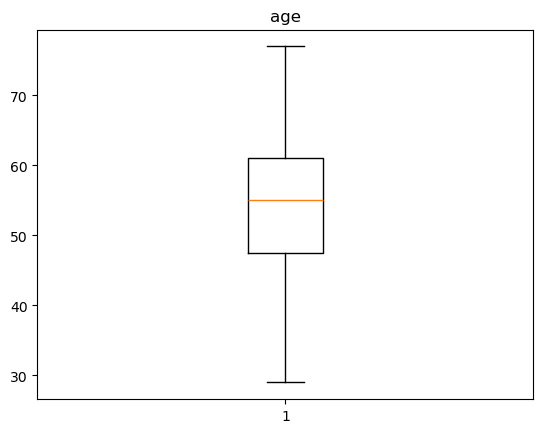

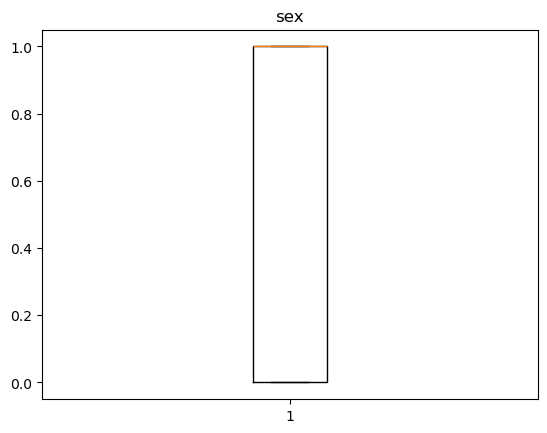

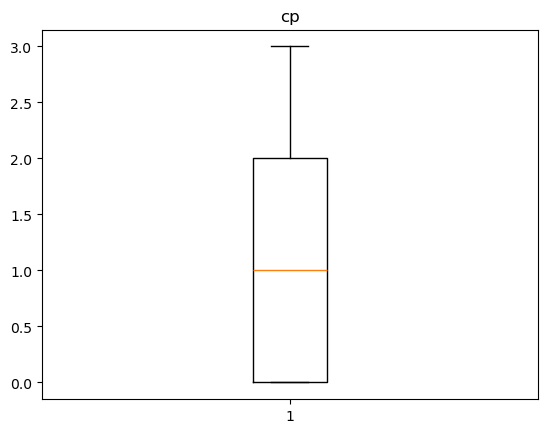

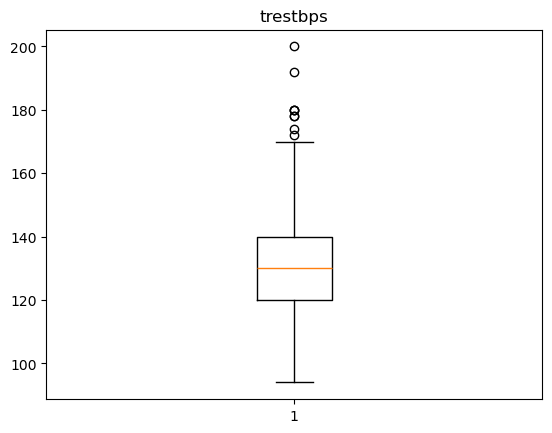

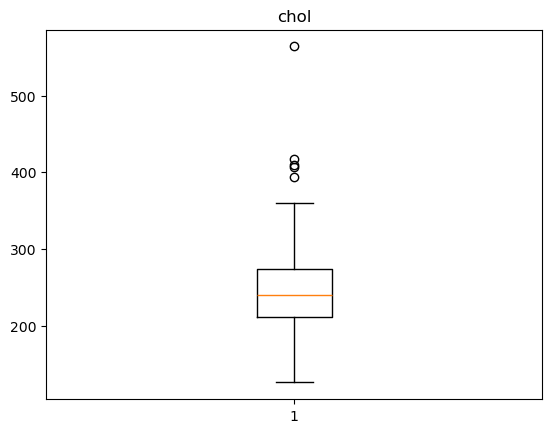

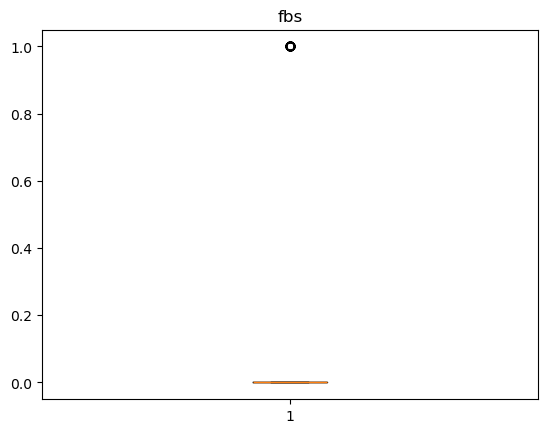

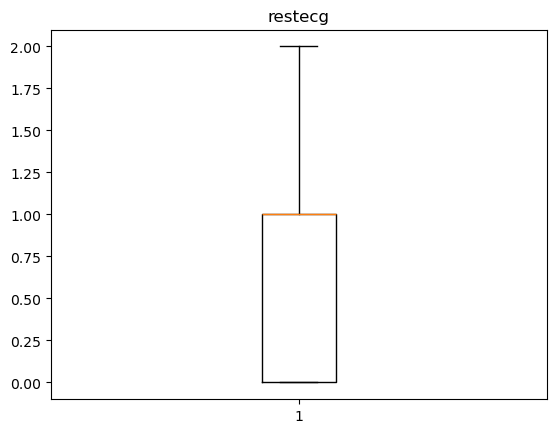

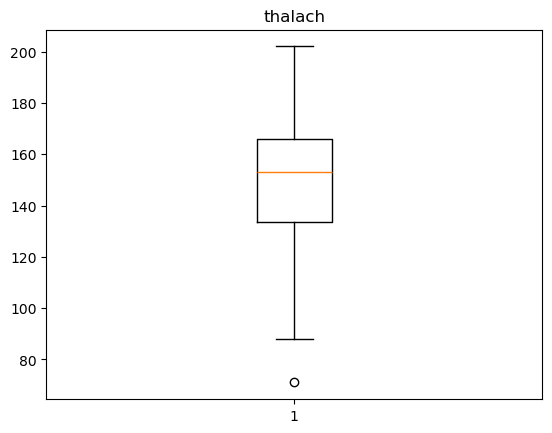

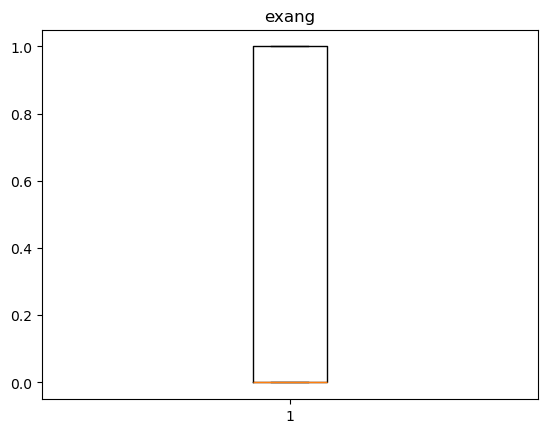

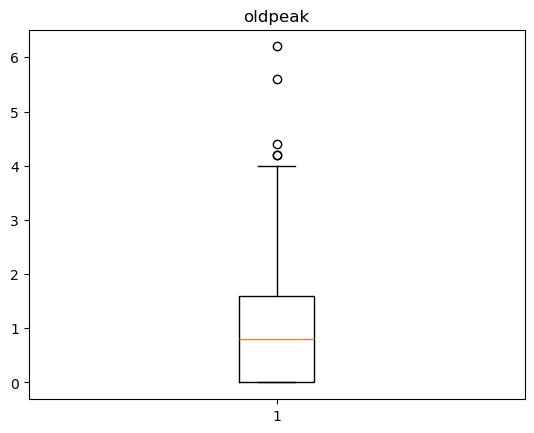

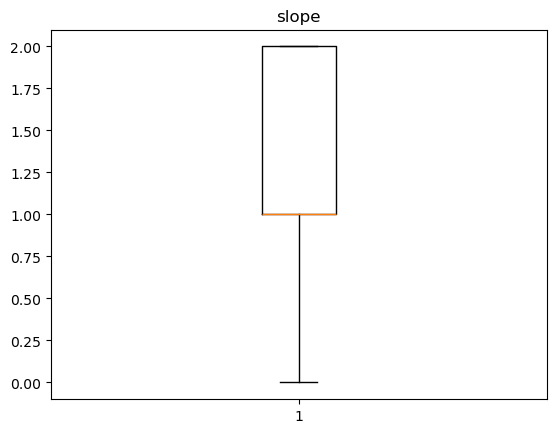

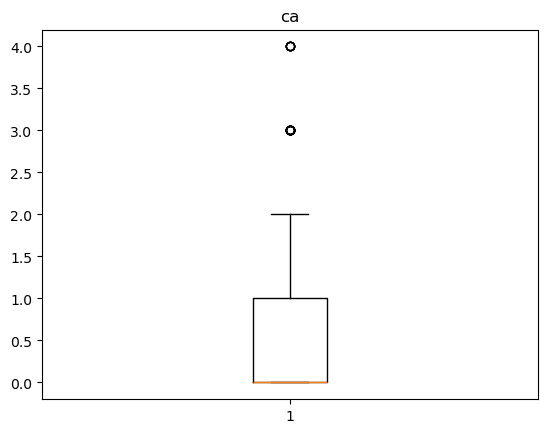

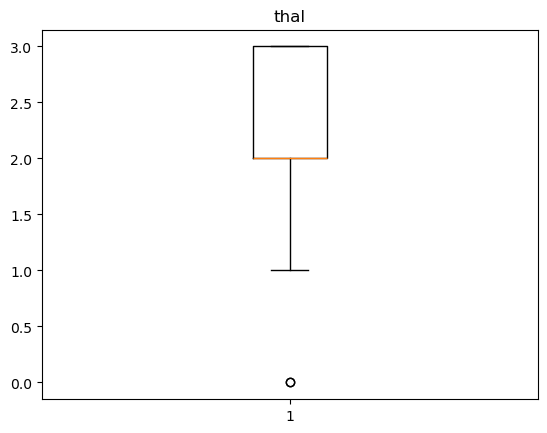

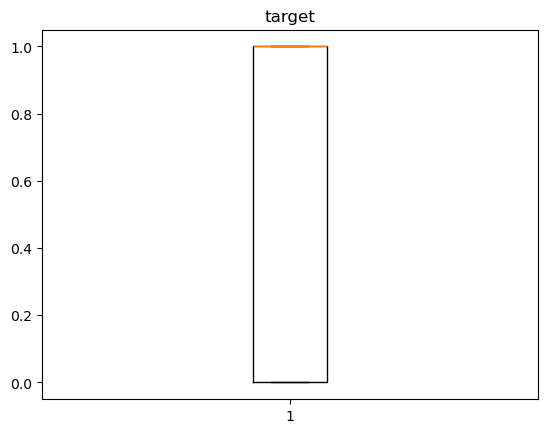

In [ ]:
#Outliers
for col in df.columns:
    if df[col].dtype!="object":
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()


In [ ]:
#Selecting the features having outliers
out_cols=['trestbps', 'chol','thalach','oldpeak','ca','thal']

In [ ]:
for col in out_cols:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  UL=Q3+1.5*IQR
  LL=Q1-1.5*IQR
  df=df[(df[col]>=LL) & (df[col]<=UL)]

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
x=df.drop("target",axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y=df["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 258, dtype: int64

Splitting the data for train and test

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [ ]:
#check the shape of X_train and X_test

x_train.shape, x_test.shape

((172, 13), (86, 13))

In [ ]:
x_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

Model Building

In [ ]:
#importing DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini=DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=0)

# fit the model
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini=clf_gini.predict(x_test)
y_pred_gini

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred_gini)

0.813953488372093

In [ ]:
#I will compare the train-set and test-set accuracy to check for overfitting.

y_pred_train_gini=clf_gini.predict(x_train)
y_pred_train_gini

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [ ]:
accuracy_score(y_train, y_pred_train_gini)

0.8604651162790697

In [ ]:
clf_gini.score(x_train,y_train)

0.8604651162790697

In [ ]:
clf_gini.score(x_test,y_test)

0.813953488372093

In [ ]:
#We can see that the training-set and test-set scores are different.
#The training-set accuracy score is 0.86 while the test-set accuracy to be 0.81.
#So, there is sign of overfitting.

[Text(0.5, 0.875, 'x[11] <= 0.5\ngini = 0.489\nsamples = 172\nvalue = [73, 99]'),
 Text(0.25, 0.625, 'x[12] <= 2.5\ngini = 0.363\nsamples = 109\nvalue = [26, 83]'),
 Text(0.125, 0.375, 'x[0] <= 57.5\ngini = 0.202\nsamples = 79\nvalue = [9, 70]'),
 Text(0.0625, 0.125, 'gini = 0.07\nsamples = 55\nvalue = [2, 53]'),
 Text(0.1875, 0.125, 'gini = 0.413\nsamples = 24\nvalue = [7, 17]'),
 Text(0.375, 0.375, 'x[2] <= 0.5\ngini = 0.491\nsamples = 30\nvalue = [17, 13]'),
 Text(0.3125, 0.125, 'gini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.4375, 0.125, 'gini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(0.75, 0.625, 'x[2] <= 0.5\ngini = 0.379\nsamples = 63\nvalue = [47, 16]'),
 Text(0.625, 0.375, 'x[4] <= 301.0\ngini = 0.153\nsamples = 36\nvalue = [33, 3]'),
 Text(0.5625, 0.125, 'gini = 0.108\nsamples = 35\nvalue = [33, 2]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.375, 'x[0] <= 55.0\ngini = 0.499\nsamples = 27\nvalue = [14, 13]'),
 Text(0.8125, 0.

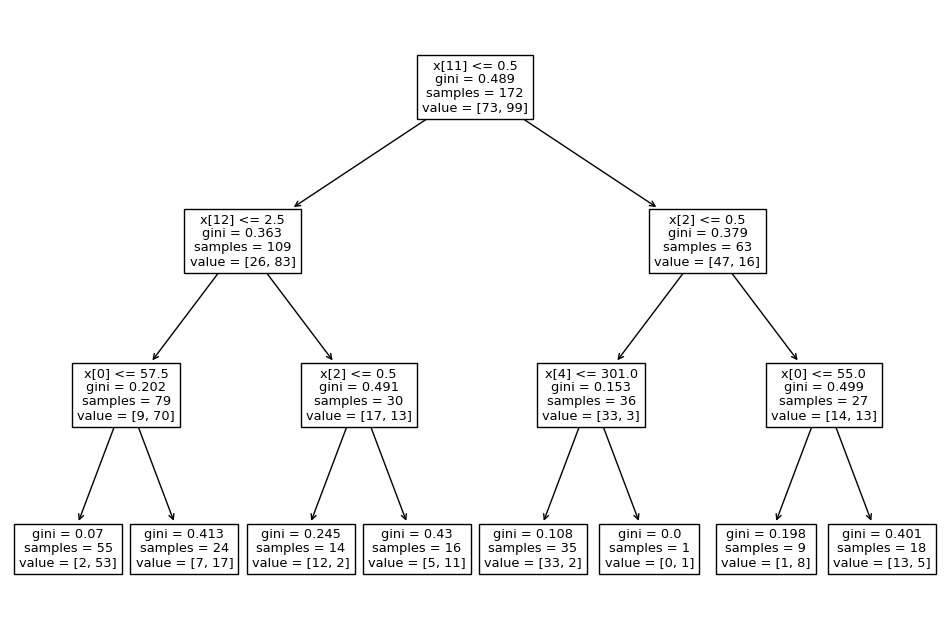

In [ ]:
#Visualize decision-trees

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train,y_train))

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=0)

# fit the model
clf_en.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en=clf_en.predict(x_test)
y_pred_en

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [ ]:
accuracy_score(y_test, y_pred_en)

0.8953488372093024

In [ ]:
#Compare the train-set and test-set accuracy
#I will compare the train-set and test-set accuracy to check for overfitting

y_pred_train_en=clf_en.predict(x_train)
y_pred_train_en


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [ ]:
accuracy_score(y_train, y_pred_train_en)

0.8372093023255814

In [ ]:
clf_en.score(x_train,y_train)

0.8372093023255814

In [ ]:
clf_en.score(x_test,y_test)

0.8953488372093024

In [ ]:
#We can see that the training-set and test-set scores are different.
#The training-set accuracy score is 0.86 while the test-set accuracy to be 0.81.
#So, there is sign of overfitting.

[Text(0.5769230769230769, 0.875, 'x[11] <= 0.5\nentropy = 0.983\nsamples = 172\nvalue = [73, 99]'),
 Text(0.3076923076923077, 0.625, 'x[12] <= 2.5\nentropy = 0.793\nsamples = 109\nvalue = [26, 83]'),
 Text(0.15384615384615385, 0.375, 'x[0] <= 57.5\nentropy = 0.512\nsamples = 79\nvalue = [9, 70]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.225\nsamples = 55\nvalue = [2, 53]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.871\nsamples = 24\nvalue = [7, 17]'),
 Text(0.46153846153846156, 0.375, 'x[2] <= 0.5\nentropy = 0.987\nsamples = 30\nvalue = [17, 13]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.592\nsamples = 14\nvalue = [12, 2]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.896\nsamples = 16\nvalue = [5, 11]'),
 Text(0.8461538461538461, 0.625, 'x[9] <= 1.95\nentropy = 0.818\nsamples = 63\nvalue = [47, 16]'),
 Text(0.7692307692307693, 0.375, 'x[2] <= 0.5\nentropy = 0.946\nsamples = 44\nvalue = [28, 16]'),
 Text(0.6923076923076923, 0.125, 'entropy = 0.575\nsamples = 22\nv

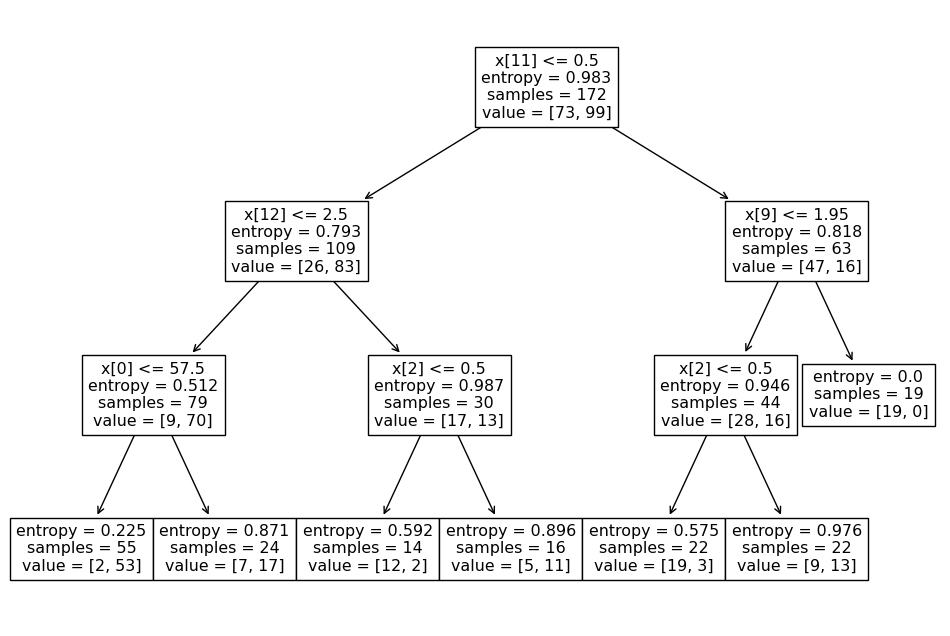

In [ ]:
#Visualization

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(x_train,y_train))

In [ ]:
#Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_en)

cm

array([[30,  5],
       [ 4, 47]], dtype=int64)

<Axes: >

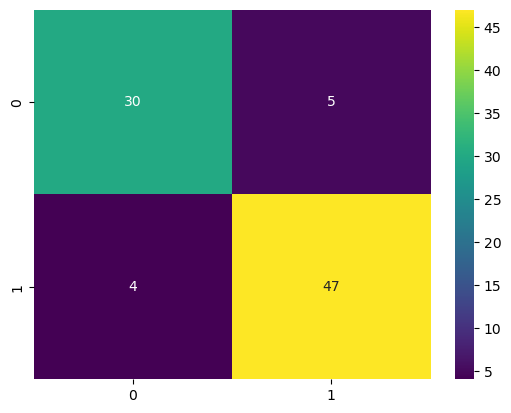

In [ ]:
sns.heatmap(cm,annot=True,cmap="viridis")

In [ ]:
#Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.90      0.92      0.91        51

    accuracy                           0.90        86
   macro avg       0.89      0.89      0.89        86
weighted avg       0.90      0.90      0.90        86

